In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('Churn_Modelling.csv')

In [32]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
df = pd.concat([df, pd.get_dummies(df['Geography'], prefix='Geo').astype(int)], axis=1)

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [36]:
df = pd.concat([df, pd.get_dummies(df['Gender']).astype(int)], axis=1)

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Female,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [38]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'])

In [39]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [43]:
x = df.loc[:, df.columns != 'Exited'].values
y = df['Exited'].values

In [44]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=42)

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Input
from tensorflow.keras.models import Sequential, Model

In [47]:
model = Sequential()

In [48]:
model.add(Flatten(input_shape=(13,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='BinaryCrossentropy')

In [51]:
model.fit(xtrain, ytrain, batch_size=64, validation_split=0.1, epochs=100)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6560 - loss: 388.1462 - val_accuracy: 0.7773 - val_loss: 46.5758
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 66.5695 - val_accuracy: 0.3227 - val_loss: 108.8461
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6705 - loss: 73.5515 - val_accuracy: 0.7160 - val_loss: 21.6722
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 74.8369 - val_accuracy: 0.5933 - val_loss: 139.8607
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6785 - loss: 90.5618 - val_accuracy: 0.8000 - val_loss: 51.5768
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 52.7781 - val_accuracy: 0.8000 - val_loss: 56.5210
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6775 - loss: 63.7012 - val_accuracy: 0.7013 - val_loss: 26.5351
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6919 - loss: 

In [52]:
ypred = model.predict(xtest)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [53]:
pred = []

for val in ypred:
    if val > 0.5:
        pred.append(1)
    else:
        pred.append(0)

Accuracy : 0.8028


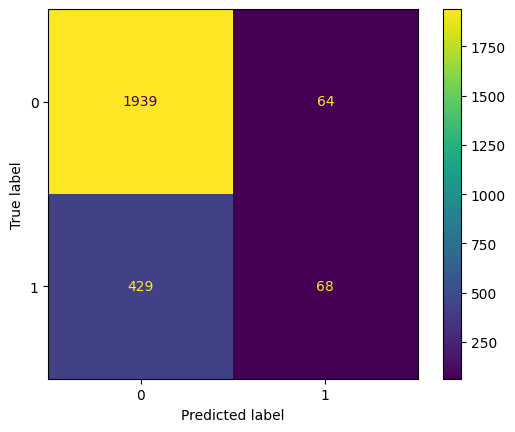

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy : {accuracy_score(ytest, pred)}")
cm = confusion_matrix(ytest, pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [57]:
from sklearn.neural_network import MLPClassifier

nnclassifier = MLPClassifier(activation='logistic', hidden_layer_sizes=(100), max_iter=300)
nnclassifier.fit(xtrain, ytrain)

MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=300)

In [58]:
ypred2 = nnclassifier.predict(xtest)

In [59]:
accuracy_score(ytest, ypred2)

0.8012

In [61]:
nnclassifier.score(xtest, ytest)

0.8012